In [54]:
import numpy as np
#Keras model module
from keras.models import Sequential
#Keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten 
#Keras CNN layers
from keras.layers import Convolution2D, MaxPooling2D
#Utilities
from keras.utils import np_utils
from keras.datasets import mnist

In [93]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [94]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


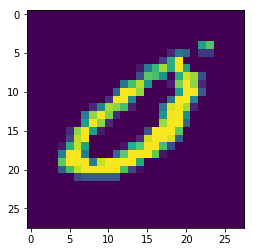

In [96]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[59934])

In [97]:
#cnn 구조 변수
batch_size = 128
nb_classes = 10
nb_epoch = 12

img_rows, img_cols = 28, 28 #input image dimensions
nb_filters = 32 #number of convolutional filters to use
nb_pool = 2 #size of pooling area for max pooling
nb_conv = 3 #convolution kernel size

In [98]:
#convert data shape from (n, width, height) to (n, depth, width, height)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [99]:
X_train.shape

(60000, 1, 28, 28)

In [100]:
#Nomalization to range [0,1]
X_train = X_train.astype('float32')
X_train = X_train / 255
X_test = X_test.astype('float32') / 255

In [101]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 1, 28, 28)
60000 train samples
10000 test samples


In [102]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [103]:
#one-hot encoding
#convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [104]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 1, 28, 28)
y_train original shape (60000,)


In [105]:
#Declare Sequential model
model = Sequential()

In [110]:
input_shape = (1, 28, 28)

In [111]:
#CNN input layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_11/convolution' (op: 'Conv2D') with input shapes: [?,1,28,28], [3,3,28,32].

In [68]:
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25)) #to avoid overfitting

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #to avoid overfitting
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adadelta')

NameError: name 'nb_filters' is not defined

In [61]:
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

In [63]:
#train the model
model.fit(X_train, Y_train,
         batch_size=128, nb_epoch=4, verbose=1,
         show_accuracy = True, verbose=1,
         validation_data=(X_test, Y_test))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


ValueError: Error when checking input: expected dense_6_input to have 2 dimensions, but got array with shape (60000, 28, 28)